In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key1':list('abcdef'),'key2':['hee','fv','w','hija','123',np.nan]})
df.columns = df.columns.str.upper()
df['KEY2'].str.len()
df['KEY1'].str.startswith('b')
df['KEY2'].str.endswith('3')
df['KEY2_2'] = df['KEY2'].str.replace('h','呵呵呵')
df['KEY3'] = df['KEY2'].str.split('')

for key,value in df['KEY3'].items():
    try:
        df['KEY3'][key] = value[1:-1]
    except:
        continue
df

,KEY1,KEY2,KEY2_2,KEY3
0,a,hee,呵呵呵ee,"[h, e, e]"
1,b,fv,fv,"[f, v]"
2,c,w,w,[w]
3,d,hija,呵呵呵ija,"[h, i, j, a]"
4,e,123,123,"[1, 2, 3]"
5,f,NaN,NaN,NaN


In [2]:
words = '结识/v 到/v 不少/a 新/a 的/u 朋友/n ，/w 充分/a 发挥/v 你/r 在/p 社交/v 方面/n 的/u 能力/n ，/w 拓展/v 自己/r 的/u 朋友/n 圈/n 。/w 晚上/nt 会/vu 跟/c 朋友/n 相约/v 到/v 环境/n 优雅/a 的/u 餐厅/n 吃饭/v ，/w 但是/c 如果/c 要/vu 喝酒/v 的/u 话，/w 切/v 莫/d 贪杯/v 。/w 今天/nt 心情/n 有些/m 不/d 稳定/a ，/w 或是/vl 对/a 他人/r 有/v 怀疑/v ，/w 在/p 待人/v 处事/v 方面/n 会/vu 显得/v 比较/v 保守/a 。/w 有些/m 事情/n 会/vu 让/p 你/r 花费/v 较/v 多/a 的/u 脑力/n ，/w 例如/v 在/p 与/c 客户/n 沟通/v 的/u 问题/n 上/nd ，/w 怎么/r 也/d 说/v 不通/v 。/w 与/c 朋友/n 、/w 家人/n'
textdf = pd.DataFrame({'og':words.split(' ')})
textdf['word'] = textdf['og'].str.split('/').str[0]
textdf['type'] = textdf['og'].str.split('/').str[1]
textdf[textdf['type']=='v']['word']

0     结识
1      到
8     发挥
11    社交
16    拓展
26    相约
27     到
32    吃饭
37    喝酒
40     切
42    贪杯
53     有
54    怀疑
57    待人
58    处事
61    显得
62    比较
70    花费
71     较
76    例如
80    沟通
87     说
88    不通
Name: word, dtype: object

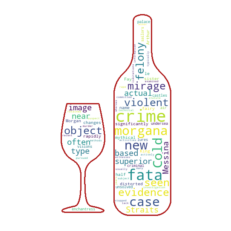

In [3]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

# star_mask = imread('icon.png')
# star_mask.dtype = np.int64
# print(star_mask)

%matplotlib inline
plt.rcParams['font.family']='SimHei'

words2 = 'Fata morgana: a superior mirage (a type of mirage seen above the actual object) often seen near the Straits of Messina. In a fata morgana, the image of the object it is based on is significantly distorted and changes rapidly. The name ‘fata morgana’ is from Morgan le Fay, a mythical fairy, half-sister of King Arthur and enchantress who lures sailors to an undersea palace with visions of castles in the air. Cold case: an unsolved criminal investigation of a crime committed many years before that has stopped being actively pursued usually because of a lack of evidence. A cold case can be examined again, with new information from witnesses, new or retained evidence, new technical methods, and recent activities of the suspect. Cold cases typically are violent or felony crimes (like murder or rape), because violent or felony crimes are not subject to a statute of limitations, whereas minor crimes are. '
text = words2

wine_mask = np.array(Image.open("wine_mask.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

    
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask, contour_width=3, contour_color='firebrick')
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()